In [57]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas import Series
from datetime import datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#!pip install xgboost
#from xgboost import XGBClassifier
import seaborn as sns

In [58]:
combined_file = "combined_stock_data.csv"
combined_df = pd.read_csv(combined_file, parse_dates=[1])

In [59]:
combined_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,56.250000,43.750000,18.750000,43.750000,37.500000
3,3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,38.461538,61.538462,15.384615,61.538462,23.076923
4,4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909


In [60]:
print(combined_df.shape)
print(combined_df.dtypes)

(1989, 34)
Unnamed: 0               int64
Date            datetime64[ns]
Label                    int64
Top1                    object
Top2                    object
Top3                    object
Top4                    object
Top5                    object
Top6                    object
Top7                    object
Top8                    object
Top9                    object
Top10                   object
Top11                   object
Top12                   object
Top13                   object
Top14                   object
Top15                   object
Top16                   object
Top17                   object
Top18                   object
Top19                   object
Top20                   object
Top21                   object
Top22                   object
Top23                   object
Top24                   object
Top25                   object
Para                    object
Subjectivity           float64
Objectivity            float64
Positive               float

In [61]:
stock_prices = "DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [62]:
print(stock_data.shape)
print(stock_data.dtypes)

(1989, 7)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


## Data Wrangling

In [63]:
# 헤드라인이랑 주가 데이터 merge해서 새로운 데이터프레임 만들기
merged_dataframe = combined_df[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)

print(merged_dataframe.shape)
merged_dataframe.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [64]:
# Label 열 가장 오른쪽 끝으로 보내기
cols = list(merged_dataframe)
print(cols)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.loc[:, cols]
merged_dataframe.head()

['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
1988,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
1987,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
1986,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
1985,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
1984,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


In [65]:
# Volume 열 integer 타입에서 float 타입으로 바꾸기
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
print(cols)

merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

['Date', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0
1,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1
2,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0
3,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1


## Data Check

In [66]:
# 기초통계량 분석 및 outlier 확인
merged_dataframe.describe()

,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1989.000000
mean,56.712522,43.287478,19.966718,36.745804,43.287478,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255,0.535445
std,21.557927,21.557927,16.373424,21.109970,21.557927,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996,0.498867
min,0.000000,0.000000,0.000000,0.000000,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,0.000000
25%,40.000000,28.571429,8.333333,21.859903,28.571429,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883,0.000000
50%,54.545455,45.454545,18.181818,33.333333,45.454545,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078,1.000000
75%,71.428571,60.000000,28.571429,50.000000,60.000000,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625,1.000000


<Figure size 7200x5760 with 0 Axes>

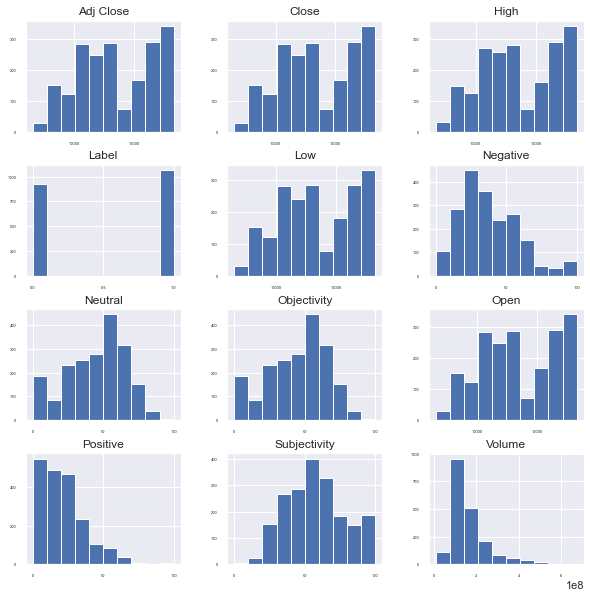

In [67]:
# 히스토그램 그려서 변수별 분포 확인
sns.set()
plt.figure(figsize=(100, 80))
merged_dataframe.hist(sharex=False, sharey=False, xlabelsize=4, ylabelsize=4, figsize=(10, 10))
pyplot.show()

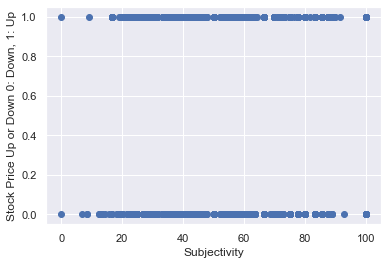

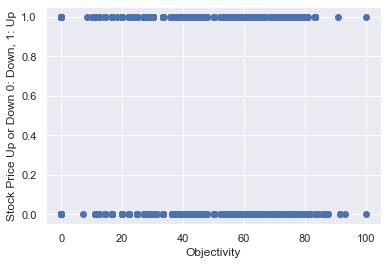

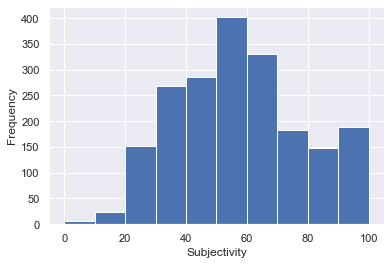

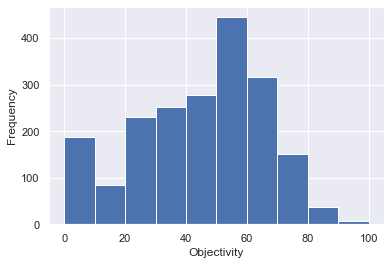

Size of the Labels column
Label
0     924
1    1065
dtype: int64


In [68]:
# 주가 vs Subjectivity, 주가 vs Objectivity scatter plot
# Subjectivity, Objectivity 히스토그램 -> Normal 분포와 유사하게 보임

pyplot.scatter(merged_dataframe['Subjectivity'], merged_dataframe['Label'])
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()

pyplot.scatter(merged_dataframe['Objectivity'], merged_dataframe['Label'])
pyplot.xlabel('Objectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()

merged_dataframe['Subjectivity'].plot(kind='hist')
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Frequency')
pyplot.show()

merged_dataframe['Objectivity'].plot(kind='hist')
pyplot.xlabel('Objectivity')
pyplot.ylabel('Frequency')
pyplot.show()

print("Size of the Labels column")
print(merged_dataframe.groupby('Label').size())

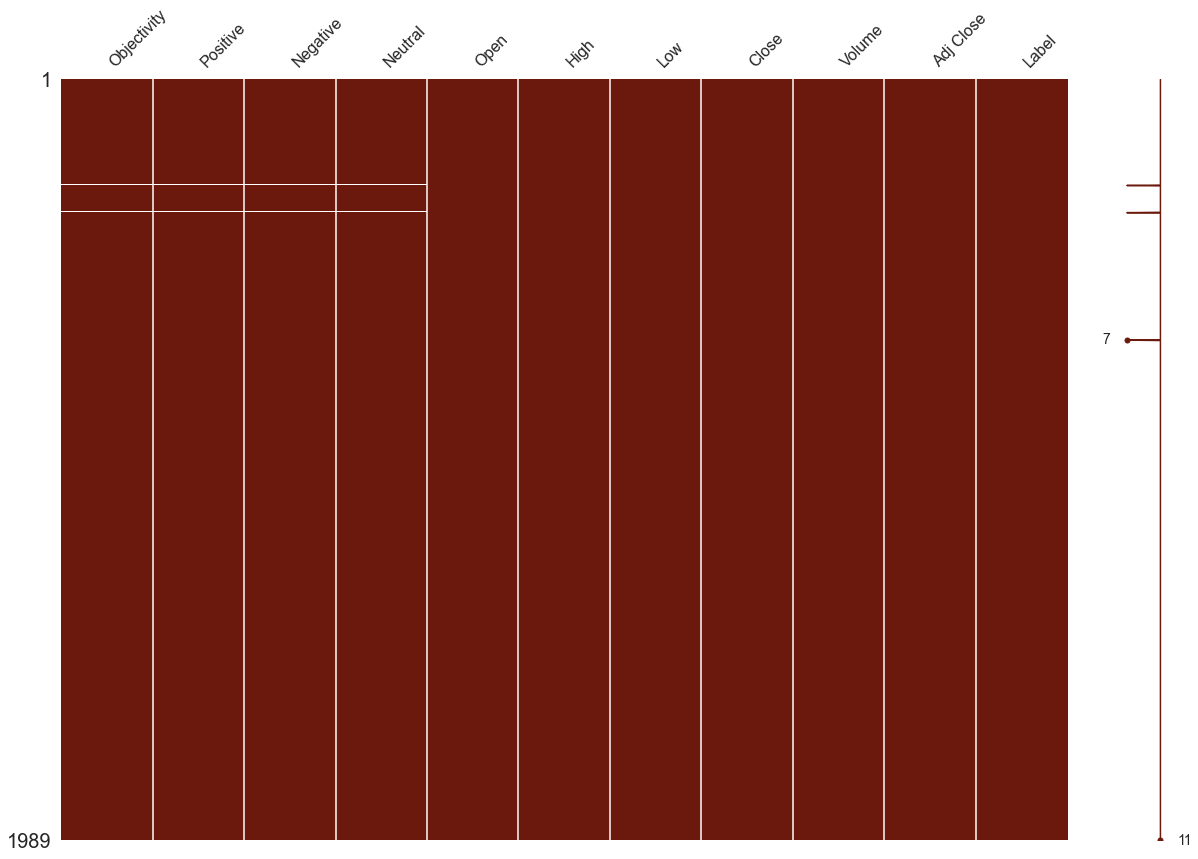

In [70]:
#결측치 확인
md_copy = merged_dataframe
md_copy = md_copy.replace(-1, np.NaN)

#!pip install missingno
import missingno as msno
msno.matrix(df=md_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

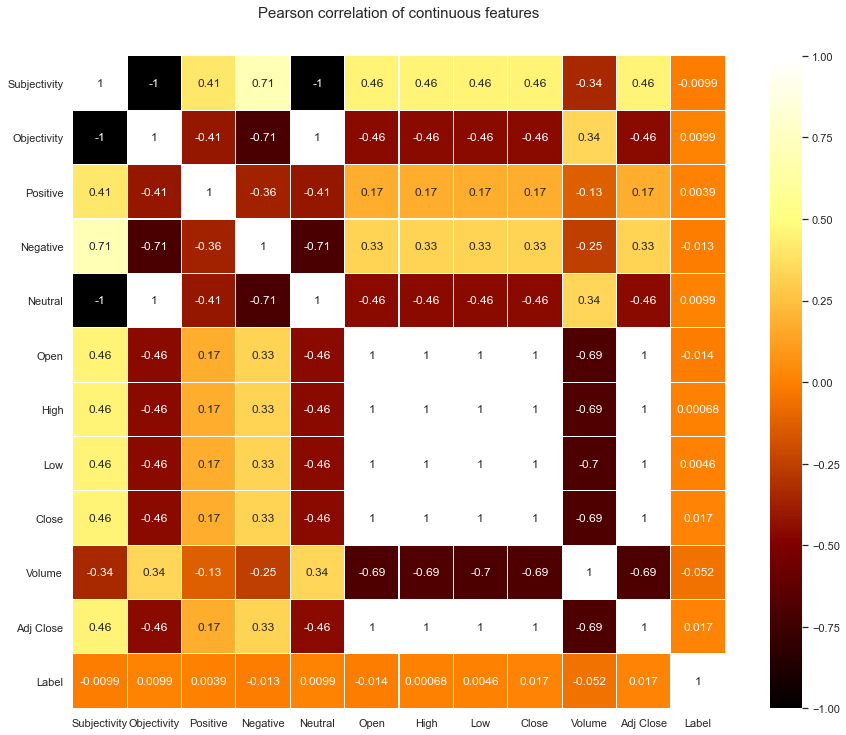

In [71]:
# Pearson correlation map -> High correlation 거의 없음
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16, 12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
pyplot.show()

## Data Visualization

In [73]:
# 월별로 resample해서 나타내기

df_month = merged_dataframe.resample('M', on='Date').mean()
df_month.tail()
#df_month.drop(index='2016-07-31')

,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
Date,,,,,,,,,,,,
2016-03-31,57.878788,42.121212,14.117965,43.760823,42.121212,17246.393288,17344.135920,17189.518999,17302.142756,1.094432e+08,17302.142756,0.772727
2016-04-30,72.566138,27.433862,31.203704,41.362434,27.433862,17838.860491,17910.481957,17757.776879,17844.365885,9.984048e+07,17844.365885,0.571429
2016-05-31,76.099773,23.900227,26.360544,49.739229,23.900227,17692.727400,17771.288132,17608.330822,17692.320034,8.947667e+07,17692.320034,0.476190
2016-06-30,71.924603,28.075397,23.748196,48.176407,28.075397,17746.760121,17835.203747,17656.194869,17754.867809,1.068191e+08,17754.867809,0.545455
2016-07-31,60.000000,40.000000,0.000000,60.000000,40.000000,17924.240234,18002.380859,17916.910156,17949.369141,8.216000e+07,17949.369141,1.000000


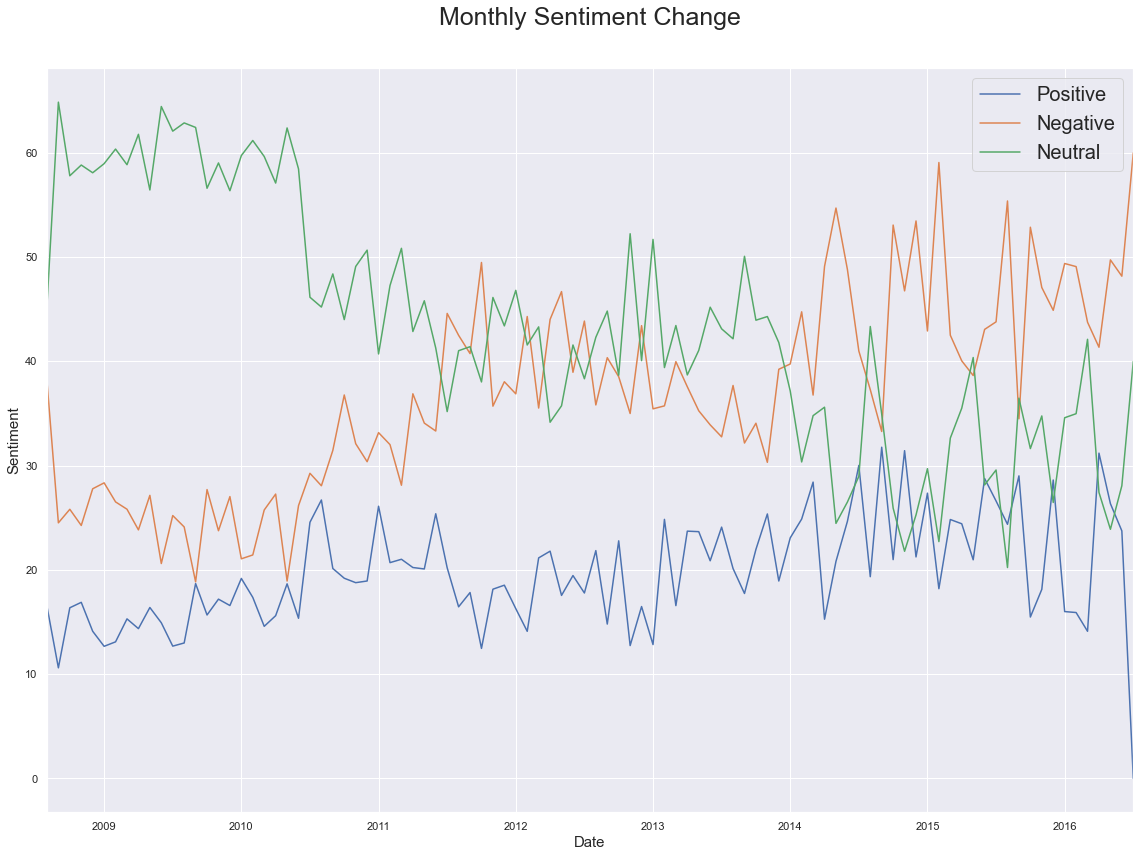

In [74]:
# Monthly Sentiment Change

plt.figure(figsize=(16, 12))
plt.title('Monthly Sentiment Change', y=1.05, size=25)
plt.xlabel('Date', size=15)
plt.ylabel('Sentiment', size=15)
df_month['Positive'].plot()
df_month['Negative'].plot()
df_month['Neutral'].plot()

plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()

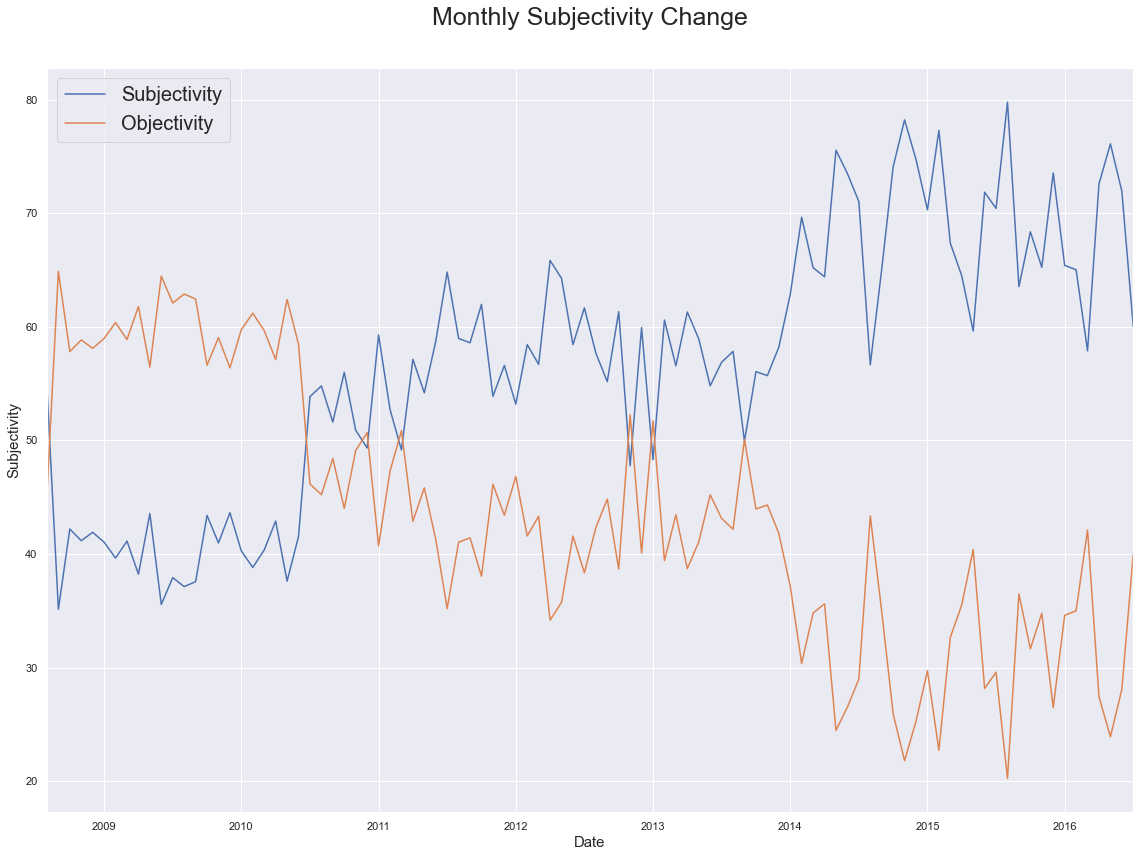

In [75]:
# Monthly Subjectivity Change

plt.figure(figsize=(16, 12))
plt.title('Monthly Subjectivity Change', y=1.05, size=25)
plt.xlabel('Date', size=15)
plt.ylabel('Subjectivity', size=15)
df_month['Subjectivity'].plot()
df_month['Objectivity'].plot()

plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()

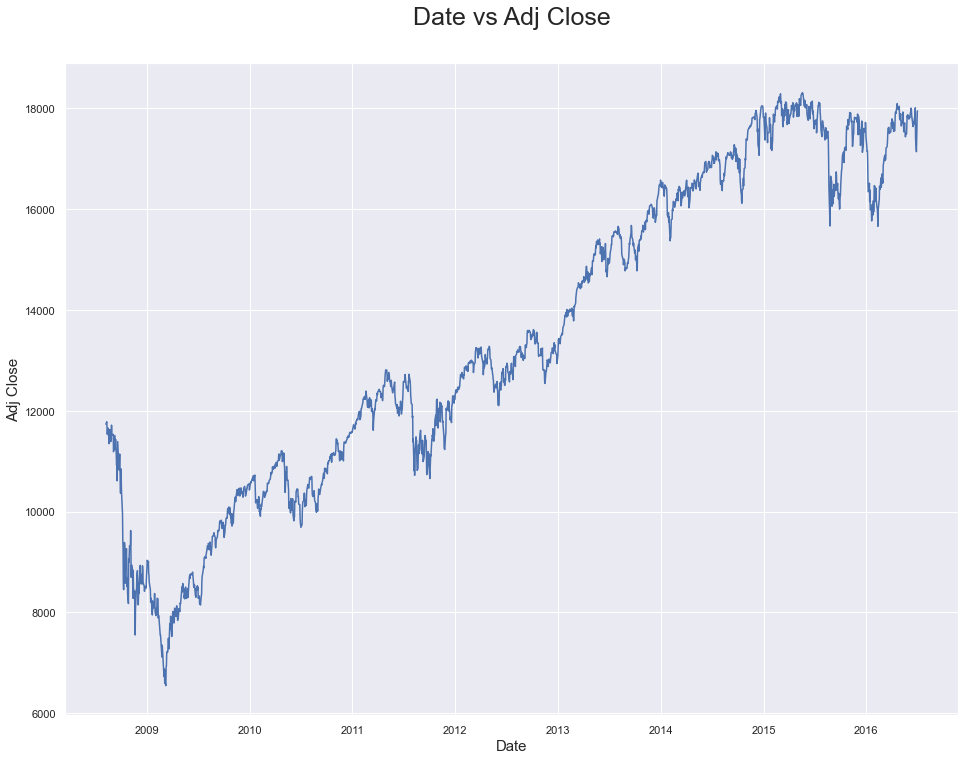

In [77]:
# Date vs Adj Close

plt.figure(figsize=(16, 12))
plt.title('Date vs Adj Close', y=1.05, size=25)
plt.xlabel('Date', size=15)
plt.ylabel('Adj Close', size=15)
plt.plot('Date', 'Adj Close', data=merged_dataframe)

/Users/kwonsoonjae/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


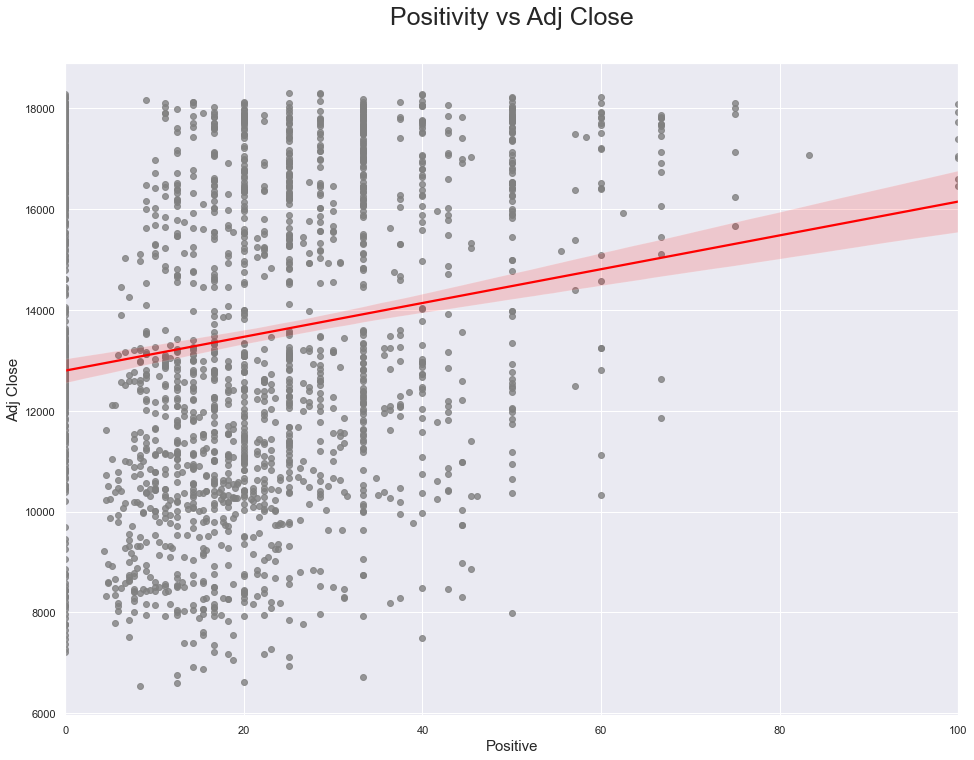

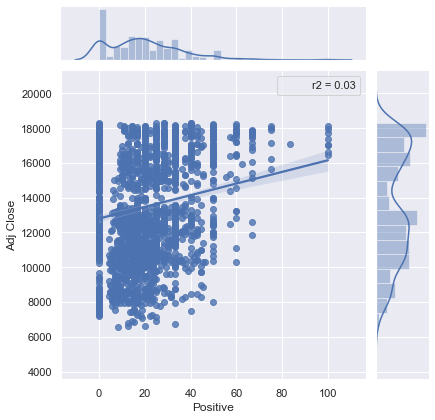

In [78]:
# Positivity vs Adj Close

plt.figure(figsize=(16, 12))
plt.title('Positivity vs Adj Close', y=1.05, size=25)
plt.xlabel('Positivity', size=15)
plt.ylabel('Adj Close', size=15)
sns.regplot(x='Positive', y='Adj Close', data=merged_dataframe,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='Positive', y='Adj Close', data=merged_dataframe, kind="reg", stat_func=r2)

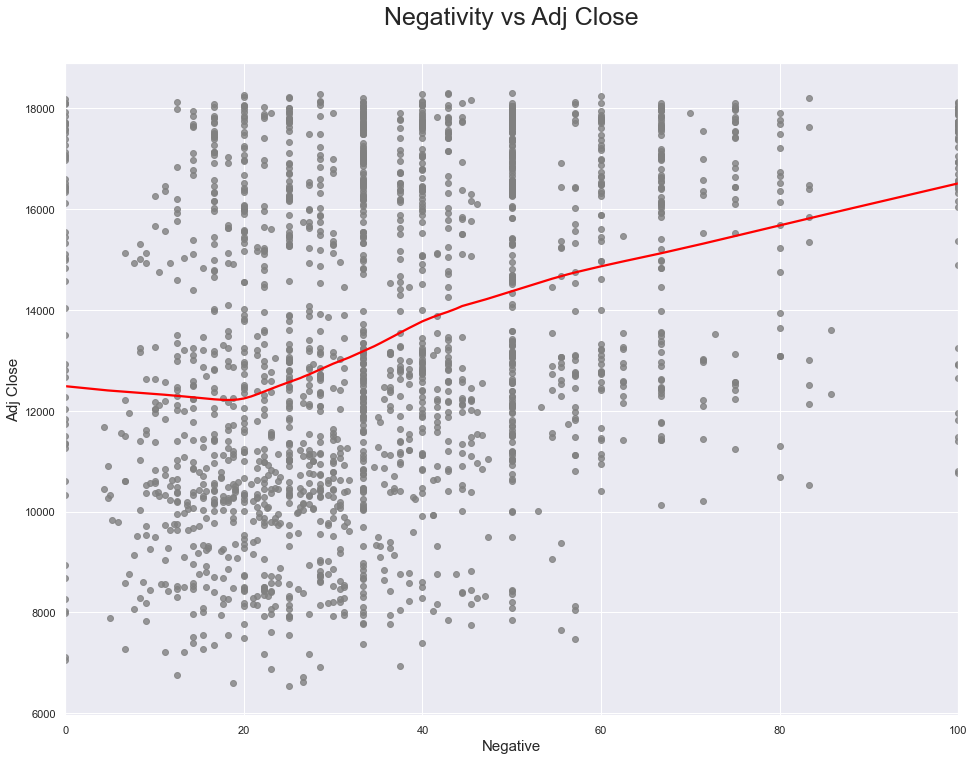

In [79]:
# Negativity vs Adj Close

plt.figure(figsize=(16, 12))
plt.title('Negativity vs Adj Close', y=1.05, size=25)
plt.xlabel('Negativity', size=15)
plt.ylabel('Adj Close', size=15)
sns.regplot(x='Negative', y='Adj Close', lowess=True, data=merged_dataframe,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

/Users/kwonsoonjae/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


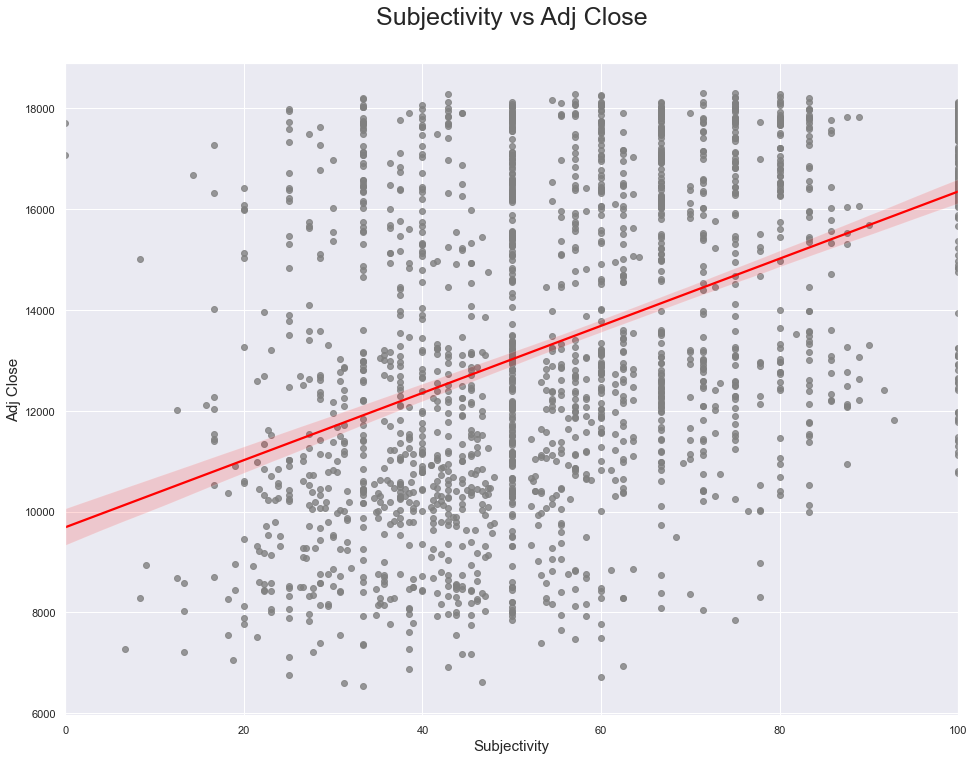

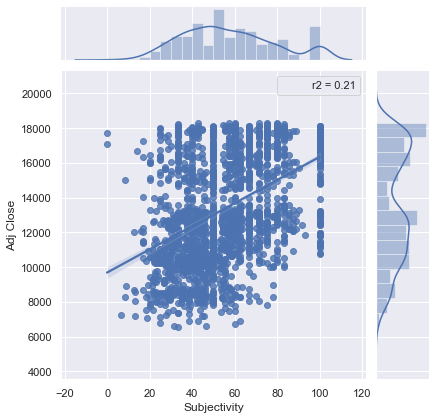

In [80]:
# Subjectivity vs Adj Close

plt.figure(figsize=(16, 12))
plt.title('Subjectivity vs Adj Close', y=1.05, size=25)
plt.xlabel('Subjectivity', size=15)
plt.ylabel('Adj Close', size=15)
sns.regplot(x='Subjectivity', y='Adj Close', data=merged_dataframe,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='Subjectivity', y='Adj Close', data=merged_dataframe, kind="reg", stat_func=r2)

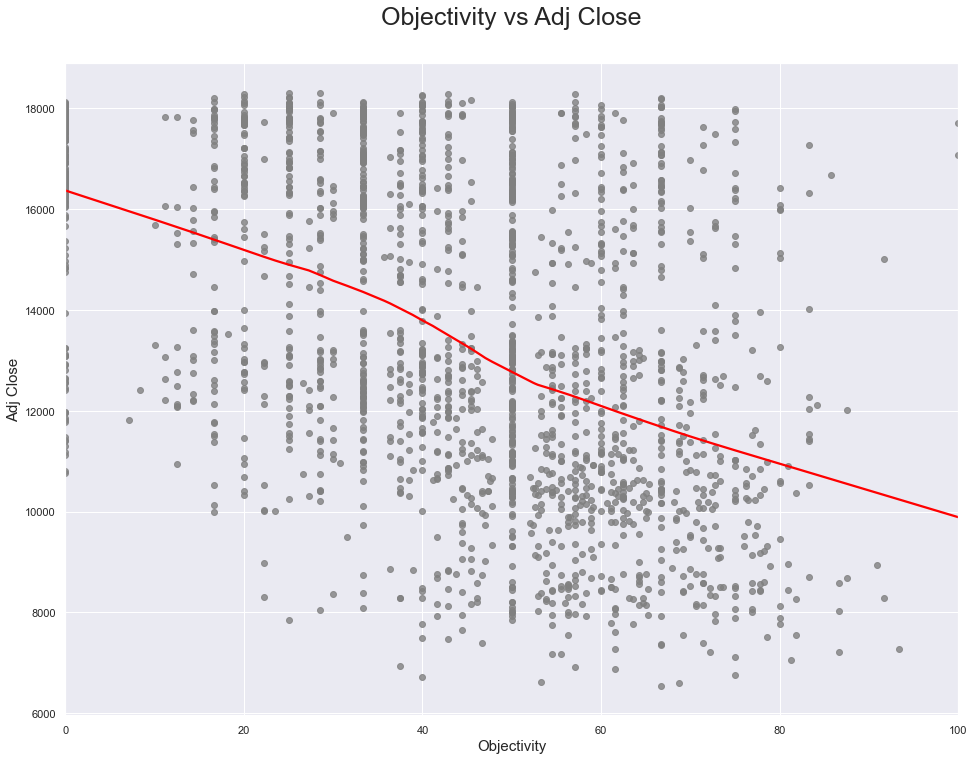

In [81]:
# Objectivity vs Adj Close

plt.figure(figsize=(16, 12))
plt.title('Objectivity vs Adj Close', y=1.05, size=25)
plt.xlabel('Objectivity', size=15)
plt.ylabel('Adj Close', size=15)
sns.regplot(x='Objectivity', y='Adj Close', lowess=True, data=merged_dataframe,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

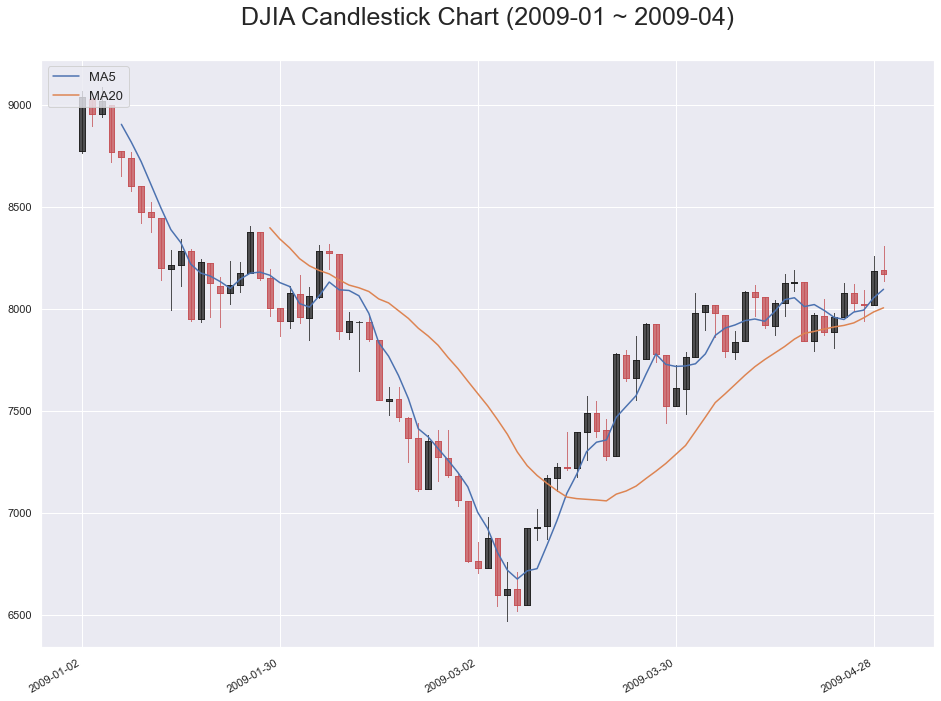

In [82]:
# 캔들스틱 차트 그리기

#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker

data = merged_dataframe.set_index('Date')
data = data['2009-01':'2009-04']

index = data.index.astype('str')

ma5 = data['Adj Close'].rolling(window=5).mean()
ma20 = data['Adj Close'].rolling(window=20).mean()

fig, ax = plt.subplots(figsize=(16,12)) # 여기서 차트 크기를 조정 할 수 있습니다.

# 5일 이동평균선을 차트에 추가 합니다.
ax.plot(index, ma5, label='MA5')

# 20일 이동평균선을 차트에 추가 합니다.
ax.plot(index, ma20, label='MA20')

# 아래 명령어를 통해 시고저종 데이터를 사용하여 캔들 차트를 그립니다.
candlestick2_ohlc(ax, data['Open'], data['High'],
                  data['Low'], data['Close'], width=0.6)

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

# 아래는 날짜 인덱싱을 위한 함수 입니다.
def mydate(x,pos):
    try:
        return index[int(x-0.5)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

# 차트 타이틀을 지정 할 수 있습니다.
plt.title('DJIA Candlestick Chart (2009-01 ~ 2009-04)', y=1.05, size=25)

# 차트에 범례를 추가할 수 있습니다.
plt.legend(loc=2, prop={'size': 13})

fig.autofmt_xdate()
plt.show()